# Example Jupyter Notebook

Here I present an exemple of how to use DustyPY. In this tutorial we will use Betelgeuse as an exemple.

### Set up a Model

The first thing to do is to create your model. In the case of Betelgeuse, we have a single star with a Temperature around 3500 K:


In [1]:
from DustyPY import Star

S = Star(Name='E1',Temperature=3600,Luminosity=1)

/Users/gtomassini/Documents/Git_Repo/DustyPY/DustyPY/utils.py:99: SyntaxWarning: "\m" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\m"? A raw string is also an option.
  if unit is None: unit = {'x': 'Wavelength ($\mu m$)', 'y': 'Flux'}
/Users/gtomassini/Documents/Git_Repo/DustyPY/DustyPY/utils.py:123: SyntaxWarning: "\m" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\m"? A raw string is also an option.
  if unit is None: unit = {'x': 'Wavelength ($\mu m$)', 'y': 'Flux'}
/Users/gtomassini/Documents/Git_Repo/DustyPY/DustyPY/utils.py:147: SyntaxWarning: "\m" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\m"? A raw string is also an option.
  if unit is None: unit = {'x': 'Wavelength ($\mu m$)', 'y': 'Flux'}


Note: For a single star, the Luminosity must always be 1 as it is the contribution of this star to the total luminosity of the model.

Then we need to create the dust around. We refer to this paper for the dust composition and grain size distribution [Cannon et al. 2023](https://ui.adsabs.harvard.edu/abs/2023A&A...675A..46C)

In [2]:
from DustyPY import Dust

Composition = {'Al2O3-comp':0.2,'MgFeSiO4':0.16,'Ca2Al2SiO7':0.64}
DustSize = {'Distribution': 'MODIFIED_MRN','amin' : 0.01, 'amax': 1}  #Size in microns (Distribution can be MRN, MODIFIED_MRN)
tau = .1 #Optical depth of the dust shell at 0.55 microns to be fitted
Sublimation=1200 #Sublimation temperature of the dust in Kelvin
Properties='common_and_addl_grain_composite' #Properties of the dust (see DustyPY documentation)
Temperature=800 #Temperature of the dust shell at the inner boundary in Kelvin
density = {'density type':'RDW',         
                        "shell":1000.
                        }

dust = Dust(Composition=Composition, DustSize=DustSize, tau=tau, Sublimation=Sublimation, Properties=Properties, Temperature=Temperature, Density=density,)

With this we can create our model with a distance of 197 pc [Graham et al. 2008](https://iopscience.iop.org/article/10.1088/0004-6256/135/4/1430):

In [3]:
from DustyPY import Model

name = 'Betelgeuse' #Name of the model
NbStar=1 #Number of stars
Stars=[S] #List of stars
Dust=dust #Dust properties
distance=197.0 #Distance in parsecs
Spectral='black_body' #Spectral type of the star (see DustyPY documentation)
SpectralFile= '/Users/gtomassini/NextCloud/These/Recherche/data/fl.dat' #File containing the spectral sphae of the star if Spectral='file_f_lambda', 'file_lambda_f_lambda' or 'file_f_nu'
GridFile='/Users/gtomassini/Nextcloud/These/Recherche/data/sed_models/marcs_z-1.00.fits' #File containing the grid of MARCS models if Spectral='marcs'
SiOAbsorption=10 #SiO absorption in the dust shell in percent (only with Spectral='engelke_marengo')

model = Model(Name='Betelgeuse', NbStar=1, Stars=[S], dust=dust, distance = 197.0, Spectral=Spectral, SpectralFile=SpectralFile, SiOAbsorption=SiOAbsorption, GridFile=GridFile)

Then we need to create the dusty object and give him the dusty PATH on your machine and the model:

In [4]:
from DustyPY import Dusty

Path = 'PATH_TO_YOUR_DUSTY_DIRECTORY' #Replace with the path to the dusty directory
Path = '/Users/gtomassini/NextCloud/These/Recherche/lib/dusty'

Lestimation=8.71e4 #Estimated luminosity of the star in solar luminosity units

dusty = Dusty(PATH=Path, model=model, Lestimation=Lestimation)

### Add the data

Once the dusty file is set with the model, we can import the data. To do this you can either import your own data like follow:

In [5]:
# from DustyPY import Data

# data = Data()

# d = data.import_data('Path_to_Data') #Replace with the path to the data

# data.set_xdata(xdata) #Replace with the x data, Wavelength in microns
# data.set_ydata(ydata) #Replace with the y data, Flux in W/m2 or Jy
# data.set_yerr(yerr)

Or you can use the built in querry to reitrive the photometry from Vizier:

In [6]:
from DustyPY import Data
Dat = Data()

table = Dat.querry_vizier_data(radius = 5, target='Betelgeuse')
Dat.set_vizier_data(table)
print(table)

 _RAJ2000   _DEJ2000         _tabname        ... sed_eflux       sed_filter     
   deg        deg                            ...     Jy                         
---------- ---------- ---------------------- ... --------- ---------------------
 88.793040   7.407311         II/379/smssdr4 ...        -- SkyMapper/SkyMapper:u
 88.793040   7.407311         II/379/smssdr4 ...        -- SkyMapper/SkyMapper:u
 88.792939   7.407064            V/137D/XHIP ...        --             Johnson:U
 88.792939   7.407063          II/7A/catalog ...        --             Johnson:U
 88.792939   7.407063          II/7A/catalog ...        --             Johnson:U
 88.793040   7.407311         II/379/smssdr4 ...        -- SkyMapper/SkyMapper:v
 88.793040   7.407311         II/379/smssdr4 ...        -- SkyMapper/SkyMapper:v
 88.792939   7.407063 J/MNRAS/471/770/table2 ...        --                HIP:Hp
 88.792939   7.407063         I/239/hip_main ...        50                HIP:Hp
       ...        ...       

If needed, you can restrict the data to a subset using the method RestrictData():

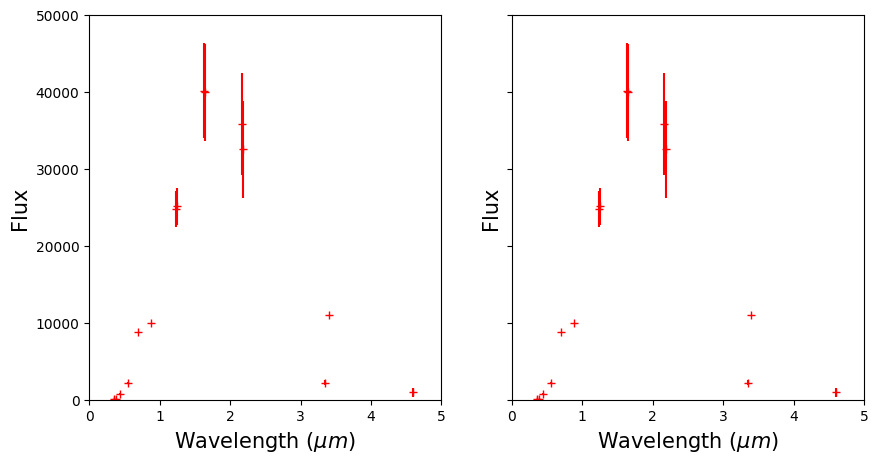

In [7]:
import matplotlib.pyplot as plt

fig,(ax1,ax2) = plt.subplots(1,2, sharey=True,figsize=(10,5))

Dat.scatter_data(xlim=(0,5),ylim=(0,5e4), ax=ax1, kwargs={'fmt':'+', 'color':'r'})
Dat.scatter_data(xlim=(0,5),ylim=(0,5e4), ax=ax2, kwargs={'fmt':'+', 'color':'r'})


You can also unred the data using the Fitzpatrick parameterization ([Fitzpatrick et al. 1999](https://ui.adsabs.harvard.edu/abs/1999PASP..111...63F))

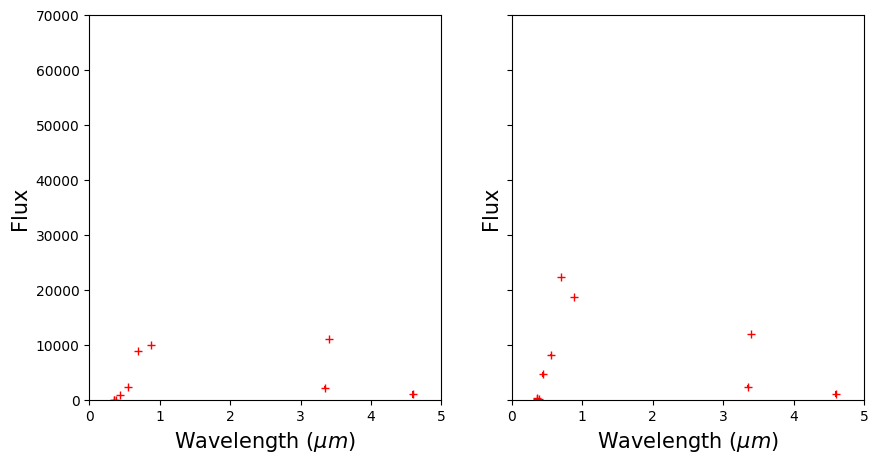

In [8]:
fig,(ax1,ax2) = plt.subplots(1,2, sharey=True,figsize=(10,5))

Dat.set_vizier_data(table)

Dat.restrict_data(['(xdata < 1) | (xdata > 3)'])

Dat.scatter_data(xlim=(0,5),ylim=(0,7e4), ax=ax1, kwargs={'fmt':'+', 'color':'r'})
Dat.unred_data(EBV=0.470)
Dat.scatter_data(xlim=(0,5),ylim=(0,7e4), ax=ax2, kwargs={'fmt':'+', 'color':'r'})


you can increase the number of wavelengths used by dusty to be more preciser on your SED (more wavelength = slower). Default is 119

In [9]:
intervals=[(0.01,0.3,50),(0.301,20,1000),(20.01,1000,50)] #List of tuples containing the interval of the wavelength and the number of points (must be no duplicates)
dusty.make_wavelength(intervals=intervals) #Create the wavelength grid

### Lunch Model

Once the model is setup, you can lunch dusty and extract the results.

/Users/gtomassini/Documents/Git_Repo/DustyPY/DustyPY/utils.py:142: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  if xlim: ax.set_xlim(*xlim)
/Users/gtomassini/Documents/Git_Repo/DustyPY/DustyPY/utils.py:143: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  if ylim: ax.set_ylim(*ylim)


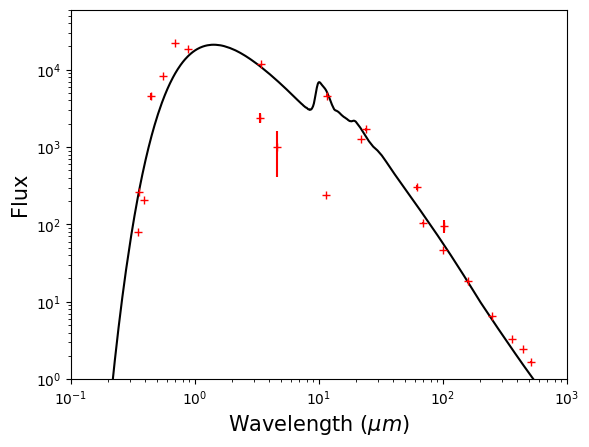

In [10]:
#Change the parameter file and lunch dusty
dusty.change_parameter()
dusty.lunch_dusty(verbose=0)


#Retrieve the results SED and plot it
dusty.make_SED(luminosity=1)

fig,ax = plt.subplots()
dusty.plot_SED(xlim=(0,5),ylim=(0,6e4), ax=ax, scale = 'log-log' ,kwargs={'color':'k'})
Dat.scatter_data(xlim=(1e-1,1000),ylim=(1,6e4), ax=ax,scale = 'log-log', kwargs={'fmt':'+', 'color':'r'})

### Fit Model

Finaly, DustyPY offer a convenient way to fit a model to the data using the librarie [pymcmcstat](https://github.com/prmiles/pymcmcstat.git).

In [11]:
#Querry the data
table = Dat.querry_vizier_data(radius = 5, target='Betelgeuse')
Dat.set_vizier_data(table)
Dat.unred_data(EBV=0.470)

#To fit data the error must be different from 0 so we restrict the data
Dat.restrict_data(['yerr != 0.'])

In [ ]:
from DustyPY import DustyFit

# 1. Mise à jour de la grille de longueurs d'onde du modèle
# Plus il y a de points, plus la SED est précise, mais le temps de calcul augmente.
dusty.make_wavelength(intervals=intervals)

# 2. Initialisation de l'objet DustyFit
# Nous spécifions 'ncpu' ici pour activer le calcul parallèle si souhaité.
fit = DustyFit(dusty, data=Dat)

# 3. Paramètres physiques à ajuster
# 'sample': True indique que le paramètre sera exploré par le MCMC.
Param = {
    'Temp1': {'theta0': 3500, 'prior_type': 'gaussian', 'mu': 3500, 'sigma': 300, 'sample': True}, 
    'Opacity': {'theta0': 0.1, 'prior_type': 'uniform', 'minimum': 0.01, 'maximum': 1.0, 'sample': True},
    'Lest': {'theta0': 1.0, 'prior_type': 'uniform', 'minimum': 0.0, 'maximum': 10.0, 'sample': True},
    'shell': {'theta0': 100.0, 'prior_type': 'uniform', 'minimum': 10.0, 'maximum': 200.0, 'sample': False},
}

# 4. Paramètres de simulation MCMC (Nomenclature PyMCMC)
# Ces clés sont maintenant gérées par la classe MCfit refactorisée.
ParamFit = {
    'nsimu': 1000,           # Nombre total d'itérations
    'method': 'DRAM',        # Algorithme (MH, AM ou DRAM)
    'adaptint': 10,         # Intervalle d'adaptation de la covariance
    'waitbar': True,         # Afficher la barre de progression
    'burn_in_fraction': 0.2  # Fraction de la chaîne à écarter (20%)
}

# 5. Configuration et lancement du fit
fit.set_Param(Param)
fit.set_ParamFit(ParamFit)

# 'chi2_modified' normalise le fit par rapport à la bande Ks (2.19 microns).
# 'logfile=True' permet de suivre l'exécution interne de Dusty si nécessaire.
fit.lunch_fit(chi2='Chi2_modified', logfile=True, Jansky=True)

/Users/gtomassini/Nextcloud/These/Recherche/lib/PyMCMC/PyMCMC/fitter.py:89: RuntimeWarning: divide by zero encountered in log
  self.log_det_cov = 2.0 * np.sum(np.log(self.y_err))
MCMC Sampling: 100%|██████████| 10/10 [00:11<00:00,  1.18s/it]

Fitting completed in: 12.75 s



Parameter       | Mean ± std           | HDI 95%              | MAP       
-------------------------------------------------------------------------------------
Temp1           | 3619.7690 ± 108.6430 | [3427.647, 3713.869] | 3445.5524
Opacity         | 0.1029 ± 0.0021      | [0.099, 0.106]       |   0.0988
Lest            | 1.0692 ± 0.0500      | [0.978, 1.136]       |   1.1127
shell           | 89.2719 ± 6.1100     | [81.869, 99.348]     |  84.7699

 Minimum reduced Chi2: 765135.539
 AIC: 10.623 | BIC: 16.228 | WAIC: 2.970


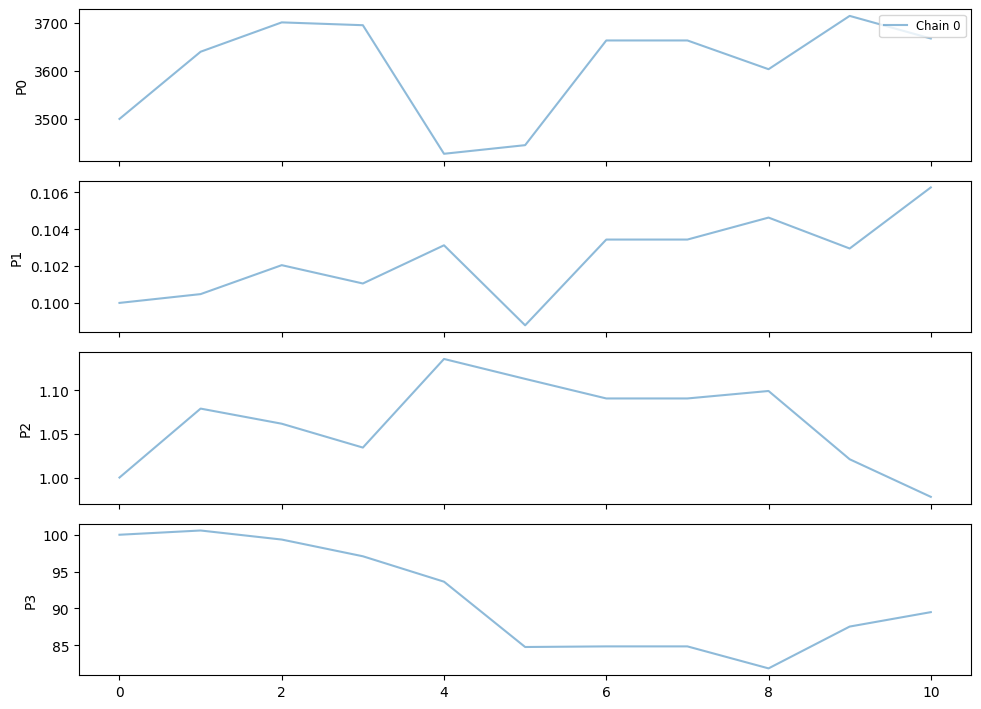

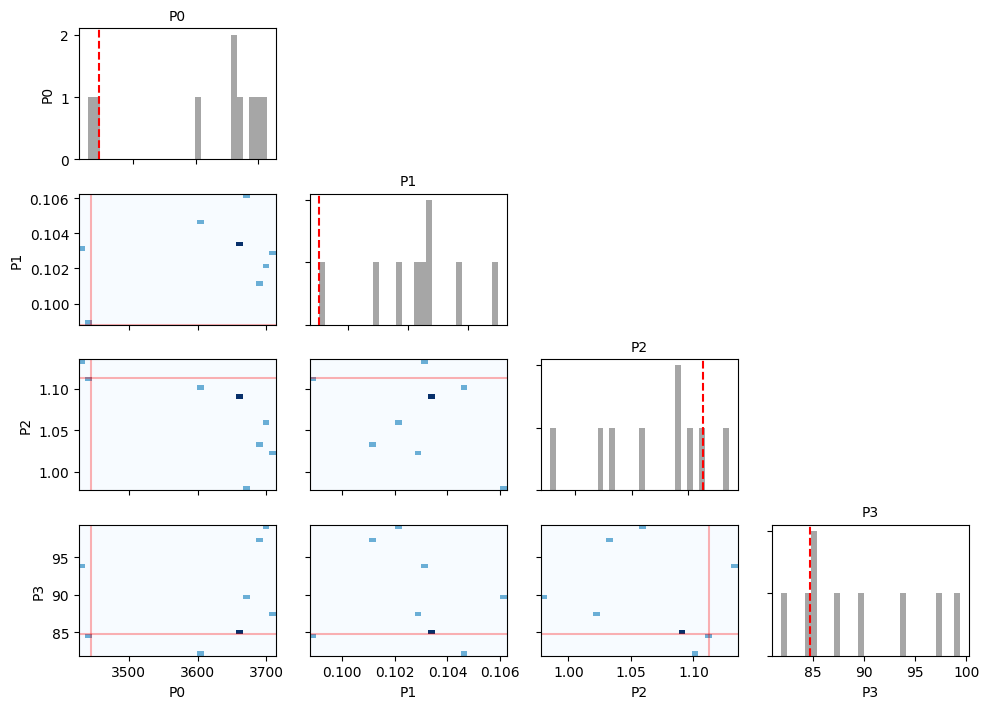

In [24]:
# 6. Affichage des résultats
fit.print_results() # Statistiques et diagnostics (R-hat si ncpu > 1)
fit.plot_stats()    # Traces des chaînes et Corner Plot

You can print the results:

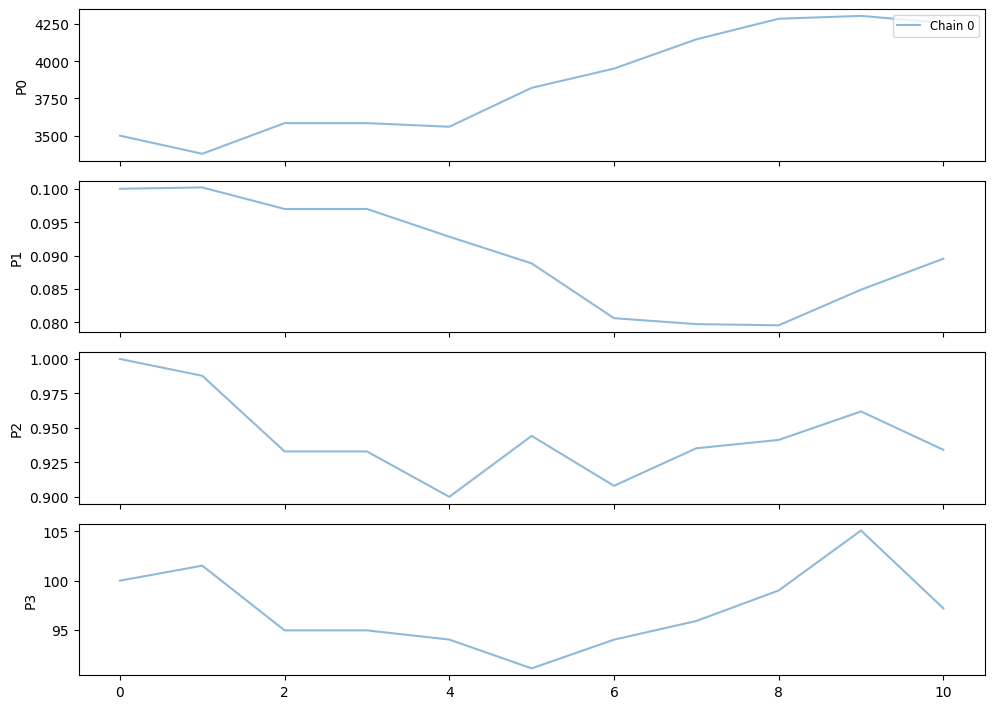

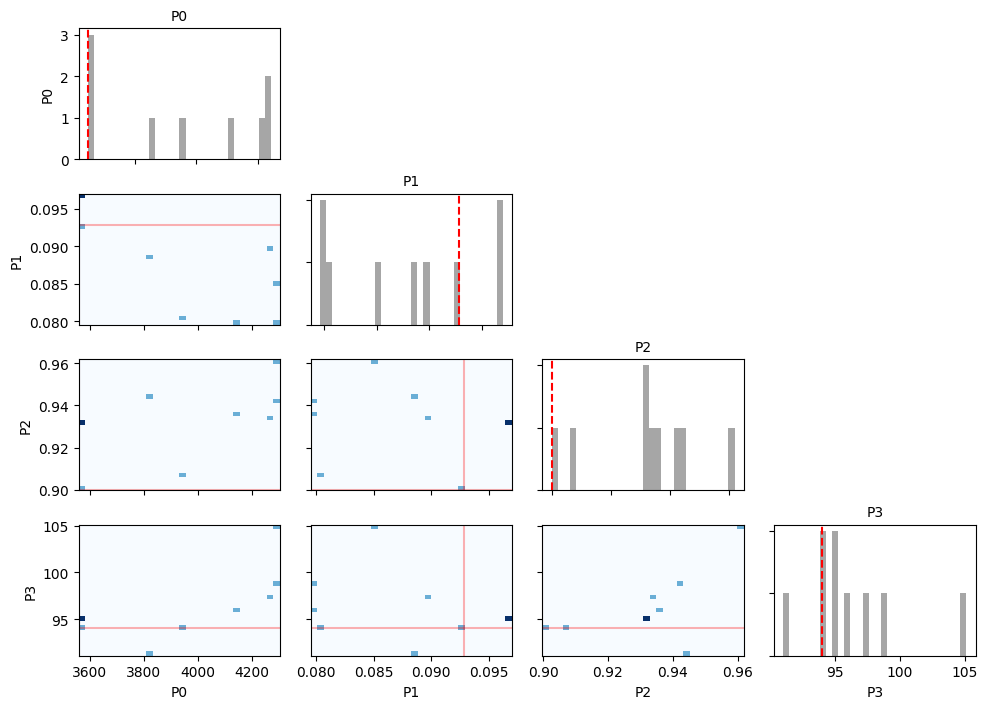

In [14]:
fit.plot_stats()    # Traces des chaînes et Corner Plot

In [15]:
fit.get_Fit().print_results()


Parameter       | Mean ± std           | HDI 95%              | MAP       
-------------------------------------------------------------------------------------
Temp1           | 3942.8469 ± 316.9056 | [3559.925, 4302.669] | 3559.9247
Opacity         | 0.0878 ± 0.0070      | [0.080, 0.097]       |   0.0928
Lest            | 0.9322 ± 0.0186      | [0.900, 0.962]       |   0.8998
shell           | 96.2417 ± 3.9842     | [91.083, 105.095]    |  94.0117

 Minimum reduced Chi2: 432388.107
 AIC: 10.716 | BIC: 16.321 | WAIC: 4.001


And plot it:

/Users/gtomassini/Documents/Git_Repo/DustyPY/DustyPY/DustyFit.py:301: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


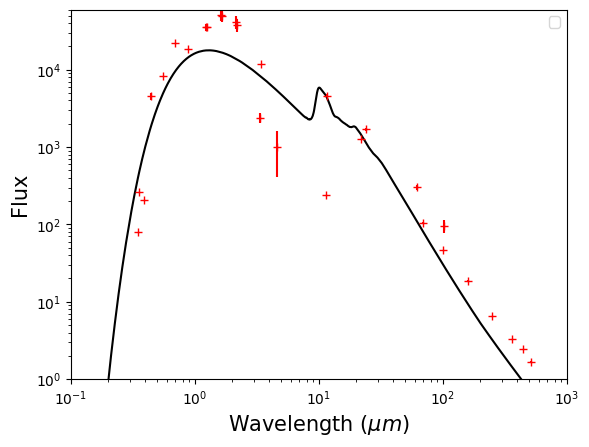

In [16]:
fig,ax = plt.subplots()

fit.plot_results(xlim=(1e-1,1000),ylim=(1,6e4), ax=ax,scale = 'log-log', kwargs_fit={'color':'k'}, kwargs_data={'fmt':'+', 'color':'r'})

You can also get all the fitted parameter and there error and the value of $\chi^2$: 

In [17]:
stats = fit.get_Fit().get_Stats()['mean']
error = fit.get_Fit().get_Stats()['std']
chi2 = fit.get_chi2(chi2='Chi2_modified', Jansky=True)

print('Fitted Parameters:')
for i, key in enumerate(Param):
    print(f"{key}: {stats[i]:.4f} ± {error[i]:.4f}")
print(f"Chi2_modified: {chi2:.4f}")

Fitted Parameters:
Temp1: 3942.8469 ± 316.9056
Opacity: 0.0878 ± 0.0070
Lest: 0.9322 ± 0.0186
shell: 96.2417 ± 3.9842
Chi2_modified: 3.5749


# Advance analysis

From dusty you can get a lot of information on the dust like the radius of dust formation, temperature on the iner ring and the outter ring, and with a dust density model of Radiatively Driven Winds, the mass loss and dust speed.

If we change the power law density by a driven wind in our model:

In [18]:
density = {'density type':'RDW', "shell":68.21}

dust.set_Density(density) #Update the density profile
model.set_Dust(dust) #Update the dust in the model
dusty.set_Model(model) #Update the model in dusty
dusty.change_parameter() #Change the parameter file
dusty.lunch_dusty(verbose=0) #Lunch dusty with the new density profile

We can then access to all the calculated parametr for the mass loss.

In [19]:
dusty_out = dusty.get_results()

for key in dusty_out:
    print(f"{key}: {dusty_out[key]}")

tau0: 0.0878
Psi/Psi0: 1.04
Fi(W/m2): 26100.0
r1(cm): 342000000000000.0
r1/rc: 22.9
theta1: 2.56
T1(K): 800.0
Td(K): 103.0
RPr(1): 3550000.0
e(%): 0.0
Mdot: 1.01e-05
Ve: 0.517
M>: 0.0


As everything in dusty is scalled for the case of a $10^4 L_\odot$ star, we need to scale every value back to our case. For the radius of dust formation the formula is : $r = r_{dusty} \sqrt(\frac{L \,[L_\odot]}{10^4})$ in cm  

In [20]:
import numpy as np

L = stats[-1]*Lestimation

r_dusty = dusty_out['r1(cm)']
r_vrai = r_dusty*np.sqrt( L / 1e4)
print(f"Inner radius of the dust shell: {r_vrai*1e-2:.2e} m")

Inner radius of the dust shell: 9.90e+13 m


For the mass loss, the formula is a less straight forward and we need to calculate the bulk density $\rho$ of the dust and have an estimation of the the gas to dust ration $r_{gd}$. With that the scaling formula is : $\dot{M} = \dot{M}_{dusty} \left( \frac{L \,[L_\odot]}{10^4}  \right)^{3/4} \sqrt( \frac{r_{gd}}{200} \frac{\rho}{3})$

In [21]:
bulk_density = { 'Ca2Al2SiO7':2.98,
               'Al2O3-comp':2.52,
               'MgFeSiO4':3.67,
               }

rho = sum([bulk_density[key]*value for key, value in Composition.items()])
print(f'rho: {rho:.2f} g/cm^3')

Mdot_dusty = dusty_out['Mdot']
rgd = 100
Mdot = Mdot_dusty * (L/1e4)**.75 * np.sqrt((rgd/200 * rho/3)) 

print(f'Mdot Dusty: {Mdot:.2e} Msun/yr')

rho: 3.00 g/cm^3
Mdot Dusty: 1.11e-03 Msun/yr


for the error, we can calculate it as : $\delta \dot{M} = \frac{3}{4*10^4} \dot{M}_{dusty} \sqrt( \frac{r_{gd}}{200} \frac{\rho}{3}) L^{-1/4} \delta L = \frac{3}{4} \dot{M} L^{-1} \delta L$. In addition, as written in the dusty manual, there is a 30 % inherent uncertainty on the mass loss to take into account.

In [22]:
delta_L = error[-1]*Lestimation

delta_Mdot = 0.75*Mdot*delta_L/L + 0.30*Mdot

print(f'Mdot Dusty: {Mdot:.2e} ± {delta_Mdot:.2e} Msun/yr')
print(f'Uncetrtainty : ± {(delta_Mdot/Mdot)*100:.2f} %')

Mdot Dusty: 1.11e-03 ± 3.68e-04 Msun/yr
Uncetrtainty : ± 33.10 %
